The below code shows descriptive analysis of a quantitative data set. In this case, and in order to show some of the capabilities of Python regarding statistical analysis, data involved in this assessment is related to house prices in Boston.
As usual, and as a general advice for any analytical work, the first step is to obtain the data set and have a very basic representation of the data to assess, from a high-level perspective, the attributes and characteristics, as well as aspects such as the number of variables, their ranges and, in sum, a general description.

In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

# Read data from file 'boston.csv' 
data = pd.read_csv("data\\boston.csv") 

data

Once the data set has been printed, main characteristics may be extracted. For instance:
- This data set has 14 variables
- There are 506 records
- All values in each column are numerical

Further information can be obtained with summary statistics:

In [2]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Mean, Standars deviation, quartile, min and max are summarised in the above table.

When researching about this particular dataset, further information can be obtained regarding the columns and their meaning. In fact, depending on the site where this data set is obtained, some of the CSV files contain this extra piece of information. For this particular project the decision was to use the simplest form of the data set, with no additional data and therefore, a description of the columns was obtained online. Espcifically, the below description corresponds to the embbeded information provided by the scikit-learn Boston dataset (from sklearn.datasets import load_boston):

- **CRIM**  per capita crime rate by town
- **ZN**  proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**  proportion of non-retail business acres per town
- **CHAS**  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**  nitric oxides concentration (parts per 10 million)
- **RM**  average number of rooms per dwelling
- **AGE**  proportion of owner-occupied units built prior to 1940
- **DIS**  weighted distances to five Boston employment centres
- **RAD**  index of accessibility to radial highways
- **TAX**  full-value property-tax rate per \$10,000
- **PTRATIO**  pupil-teacher ratio by town
- **B**  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**  \% lower status of the population
- **MEDV**  Median value of owner-occupied homes in \$1000's

Given this wide diversity of variables, summary characteristics are also quite heteregenous. In order to attempt obtaining more information about these variables the next step is to take them in consideration one by one and plot their distribution, looking for special characteristics that could help understand their distribution and behaviour.



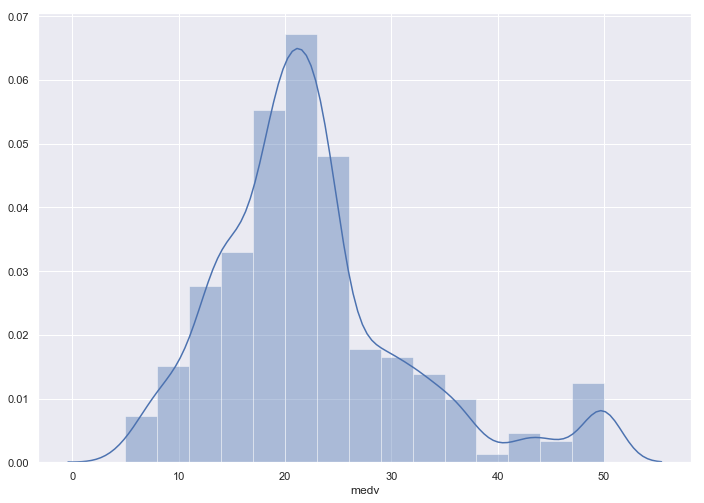

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['medv'], bins=15)
plt.show()

According to the above chart in which both histograms and kernel density estimation (KDE) have been included for the target variable MEDV, ie. the dependent variable, we can see that distribution of this variable is close to normal, whith a central value with higher frequencies which goes decreasing to both sides, in a gaussian fashion.

This particular frequency distribution plot applies to a continous variable, as MEDV, needs to transform it into an interval first (each of the bins included is an interval).

Besides this information we have extracted from the analysis, further observations may lead to a suspicion of the presence of outliers in the right side of the chart, corresponding to the higher values og houses. last bin on the right breaks the pattern observed in the other bins and in fact defies the normality of the shape. Further analysis is required to determine this. A fast and efficient way to do this is by plotting this variable in the form of a boxplot:

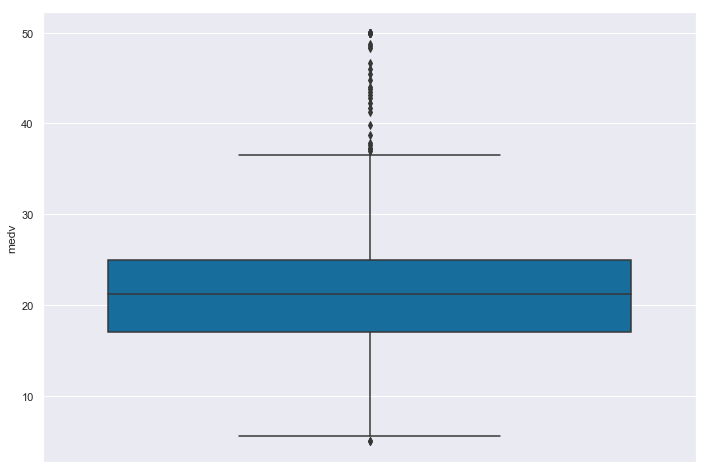

In [17]:
sns.boxplot(y=medv,data=data,palette="colorblind")

As predicted by the KDE analysis, while MEDV is an overall normally distributed variable, the existence of outliers is to be noted when performing further analysis, since these records could mislead outputs when performing calculations. The decision to keep or eliminate these extreme records is something to have in consideration in further stages of this investigation.

### Inferential Analysys

Second part of this investigation is to determine if target variable (MEDV) representing the proce of houses in Boston area is determined by one particular independent variable, which in this case is CHAS, representing the presence or not of the house in the course of the Charles river.

As previously, a frist look into both variables is the first step to get deeper knowldege about them.

In [8]:
pd.value_counts(data['chas'])

0    471
1     35
Name: chas, dtype: int64

**CHAS** variable is *categorical* with two levels: 0 and 1, representing, respectively, that the house is not in the course and the opposite. 

From the dataset's pool of 506 houses, only 35 are considered to be in the river Charles course.

In order to have a closer look in the relation with our two variables, the *dependent*, or *target* variable (**MEDV**) and the *independent* or *predictor* variable (**CHAS**), we can plot both together, showing the prices of the houses separated by the fact of being in the river or not.

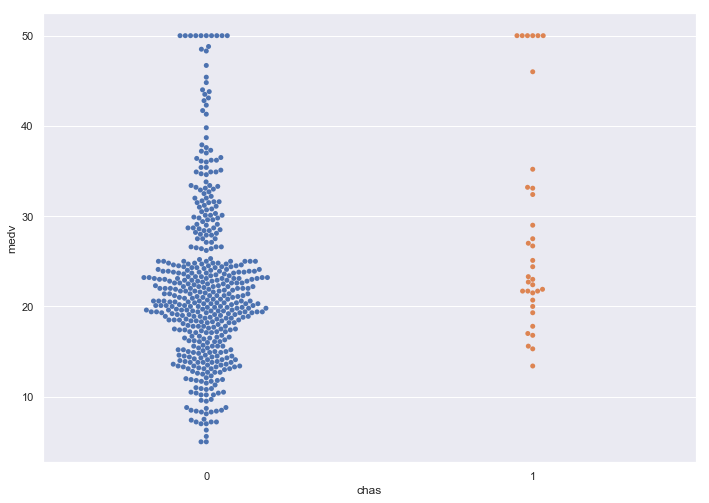

In [9]:
chas=data['chas']
medv=data['medv']

sns.swarmplot(chas,medv)

In the same line, we can also plot the dispersion or normality of variable MEDV (as done in the previous section), but in this case also splitting results dbased on the binary results of variable CHAS:

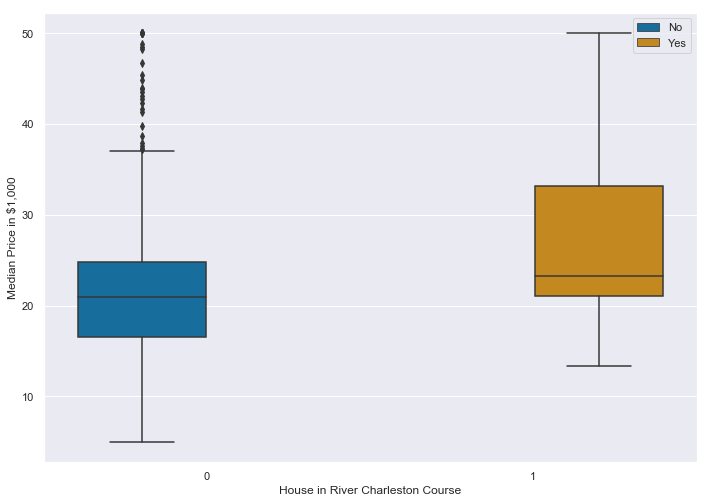

In [12]:
ax=sns.boxplot(y=medv, x=chas,data=data,palette="colorblind",hue=chas)
ax.set(xlabel='House in River Charleston Course', ylabel='Median Price in $1,000')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles,['No','Yes'])


C:\Users\luisn\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\luisn\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


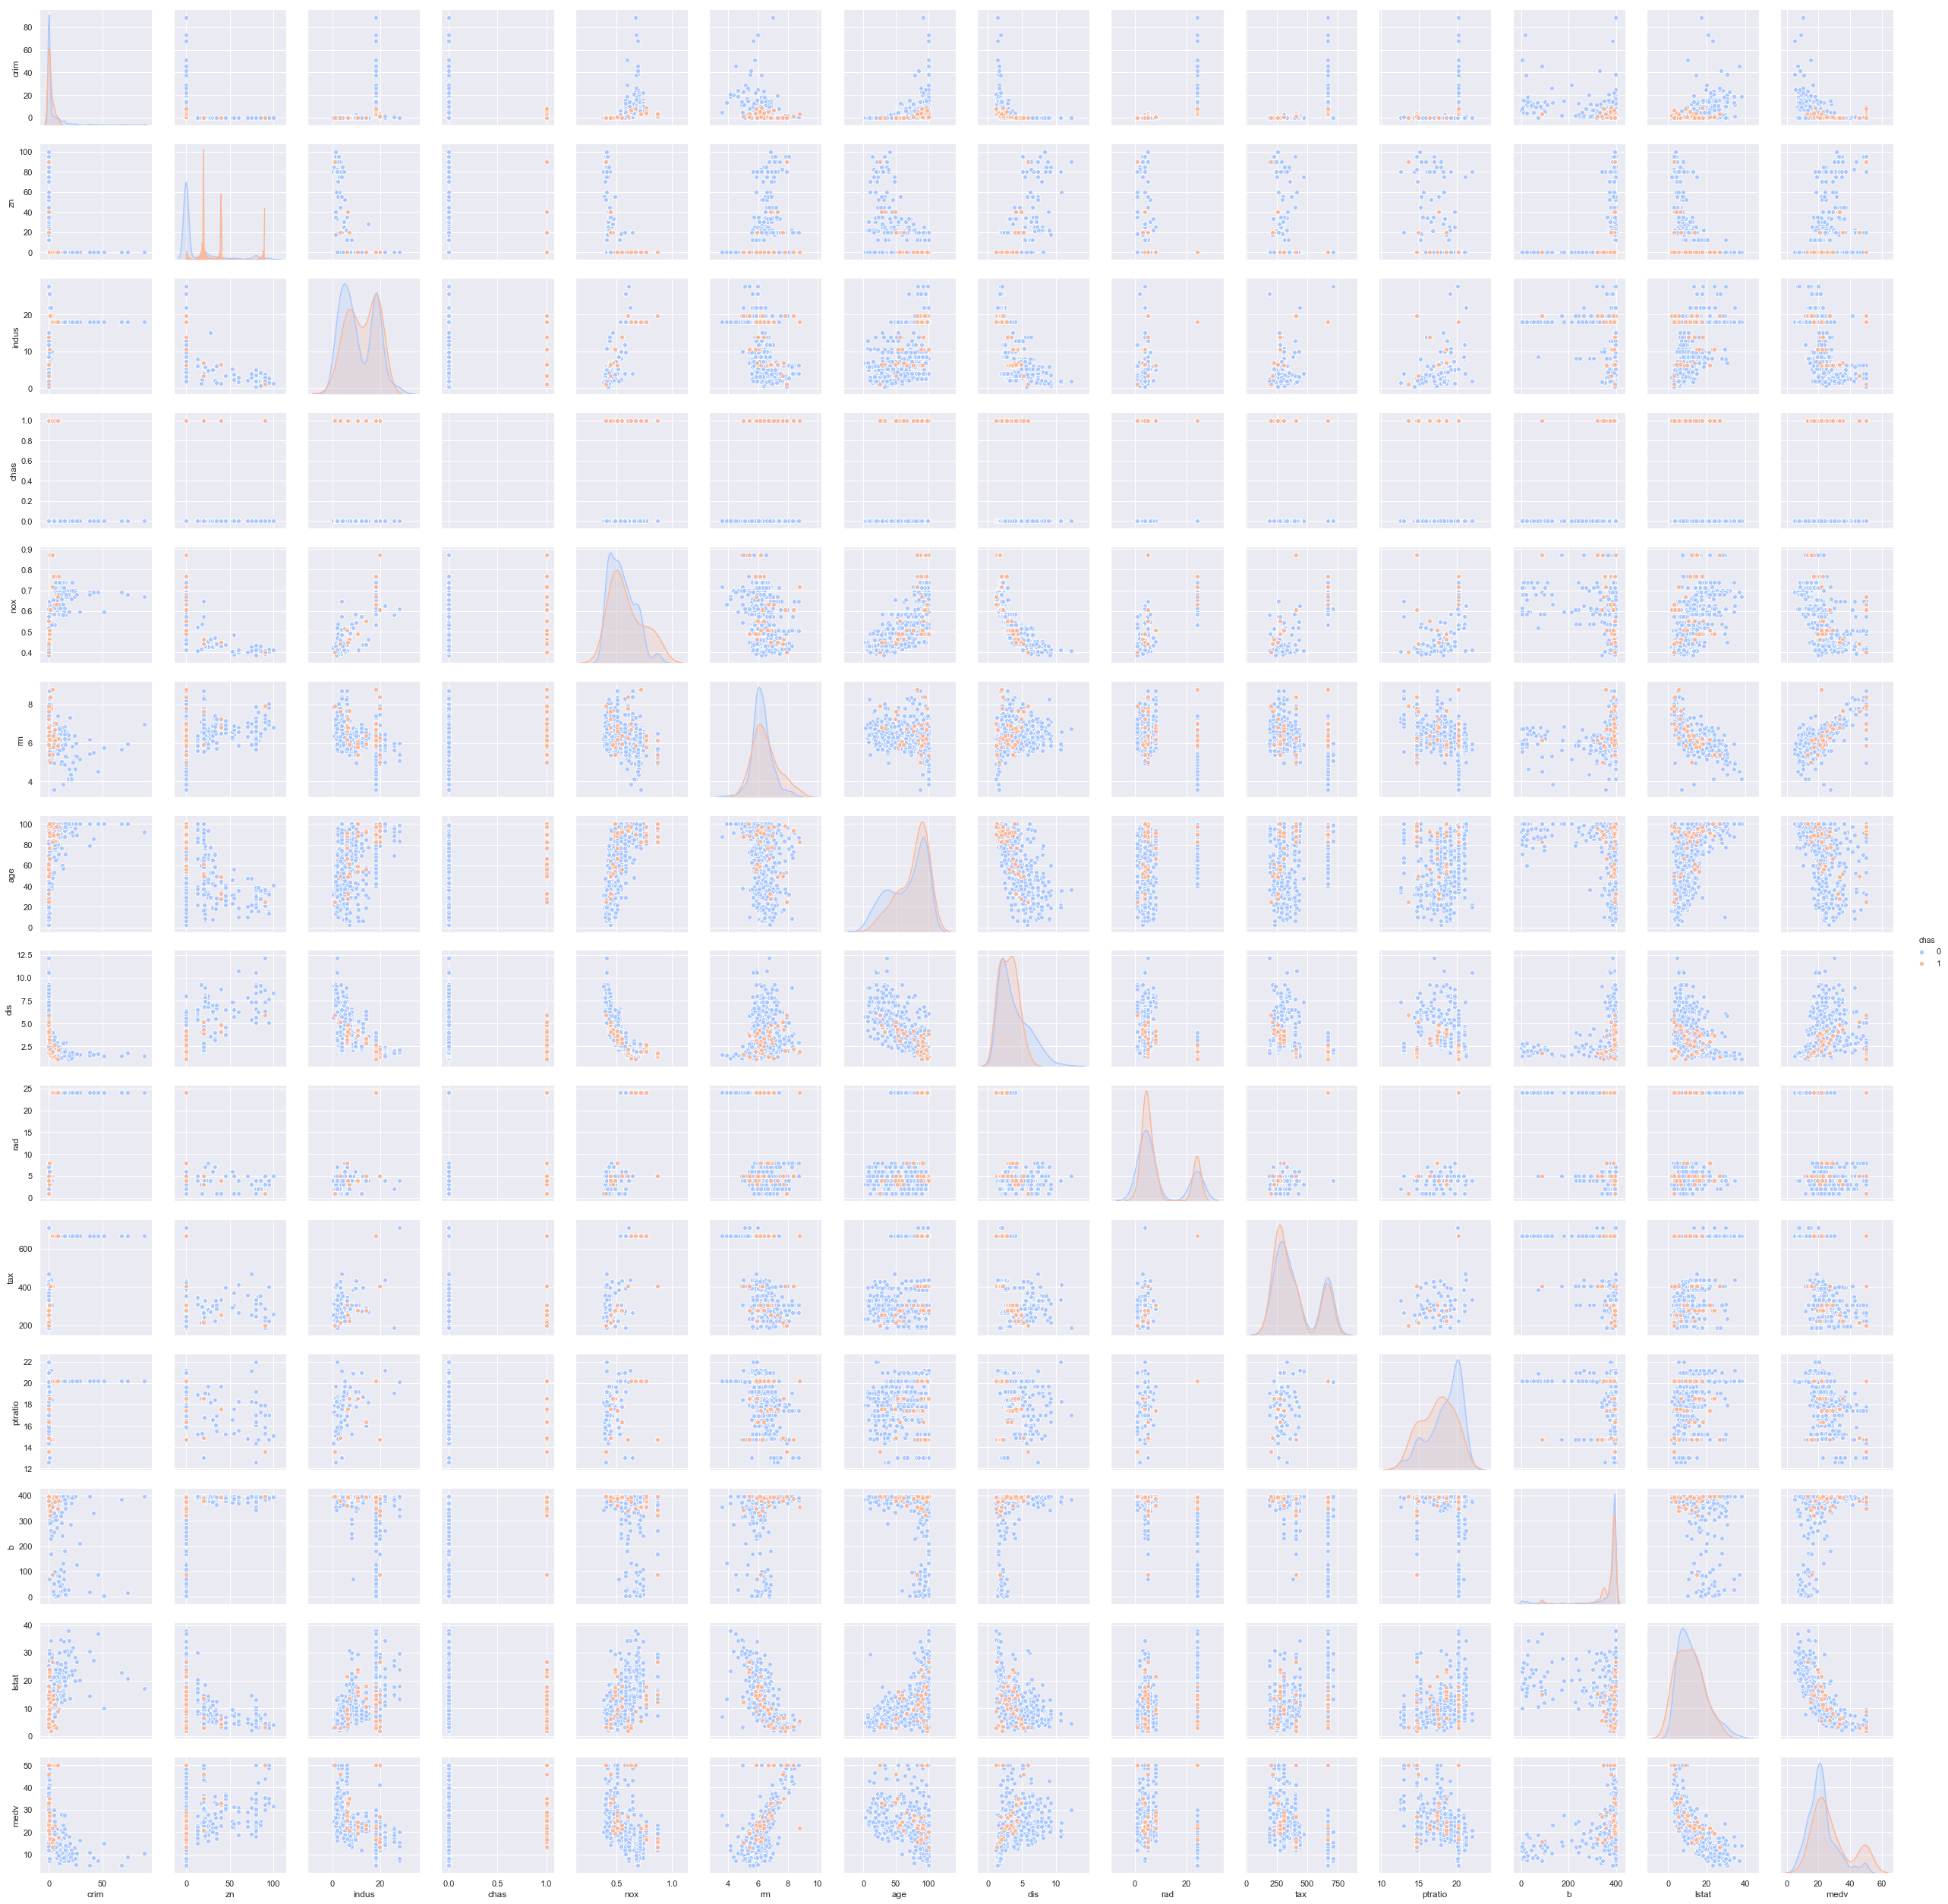

In [10]:
sns.pairplot(data, hue ="chas", palette ='coolwarm') 

Use variable CHAS as a predictor for MEDV


https://stats.idre.ucla.edu/other/mult-pkg/whatstat/


### T test

*Null hypothesis*: Price differences cannot be attributed to the river.

*Alternative hypothesis*: Price might be dependent on the fact the house is in the course of the river.

Two independet samples, comparing averages of two independent samples to determine if the null hypothesis can be rejected.

Small samples (<30): Student's T

Divide sample in two sets with prices (medv) for houses which are located along the river (chas=1) and those which are not (chas=0):

Average price when house is in the river is  28.44
Average price when house is NOT in the river is  22.09384288747346


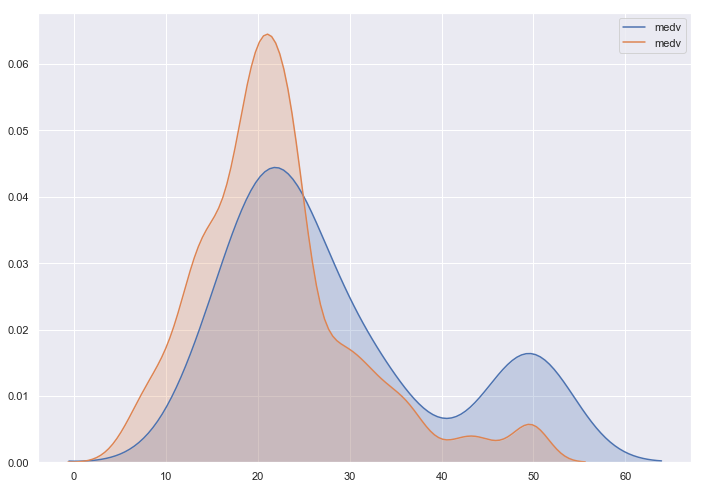

In [15]:
#Creating separate price variables depending on the river
riv=medv[chas==1]
noriv=medv[chas==0]

#Calculating the average price for each group of houses
from statistics import mean 

print ("Average price when house is in the river is ",mean(riv))
print ("Average price when house is NOT in the river is ",mean(noriv))

# Plotting price (medv) grouped by the presence of river or not (chas)

sns.kdeplot(riv, shade=True)
sns.kdeplot(noriv, shade=True)


At first glance an early estimation is that, based on the average prices and the above plot, houses in the course of the river have higher average price than the others.

A second impression would be that while both groups distribution adopts similar shapes, houses with higher prices are more likely those that are in the course of the river Charles.

However, running a T-test should clarify these first impressions.



In [ ]:

ss.ttest_ind(riv,noriv)


Such a small p-value allows to reject the null hypothesis and therefore, to stablish that the fact that the house is in the course of the river is related to the price of the house.



In [ ]:
np.corrcoef(data['chas'],data['medv'])

# TO DO:

1) Determine which variable is the independent (price)

2) Explore predictors

    2.1) Delete Outliers?

3) Correlation matrix to determine which predictors to use